In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
plt.rcParams['font.family'] = 'Malgun Gothic'
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    #pythonhashseed 환경변수 설정
    np.random.seed(seed)

seed_everything(42)

import warnings
warnings.filterwarnings('ignore')


In [2]:
light_df = pd.read_csv('./external_open/대구 보안등 정보.csv', encoding='cp949')

In [3]:
light_df

,보안등위치명,설치개수,소재지도로명주소,소재지지번주소,위도,경도,설치연도,설치형태
0,대명1동1,1,대구광역시 남구 현충로 155,대구광역시 남구 대명동 1722-4,35.846703,128.579803,2016.0,한전주
1,대명1동2,1,대구광역시 남구 현충로31길 10-1,대구광역시 남구 대명동 1723-11,35.846863,128.579406,2016.0,한전주
2,대명1동3,1,대구광역시 남구 현충로31길 9-8,대구광역시 남구 대명동 1722-56,35.846341,128.579342,2017.0,건축물
3,대명1동4,2,대구광역시 남구 현충로31길 19-11,대구광역시 남구 대명동 1722-41,35.846368,128.578922,2016.0,한전주
4,대명1동5,1,대구광역시 남구 현충로29길 22-2,대구광역시 남구 대명동 1721-22,35.845995,128.578858,2016.0,한전주
...,...,...,...,...,...,...,...,...
71908,대봉2동 165-9,1,NaN,대구광역시 중구 대봉동 165-9,35.857556,128.600023,NaN,한전주
71909,대봉2동 88-85,1,NaN,대구광역시 중구 대봉동 88-85,35.859205,128.600046,NaN,한전주
71910,대봉2동 719-20,1,NaN,대구광역시 중구 대봉동 719-20,35.859442,128.599627,NaN,한전주
71911,대봉2동 738-13,1,NaN,대구광역시 중구 대봉동 738-13,35.858244,128.597614,2010.0,건축물


In [4]:
light_df = pd.read_csv('./external_open/대구 보안등 정보.csv', encoding='cp949')[['설치개수', '소재지지번주소']]

location_pattern = r'(\S+) (\S+) (\S+) (\S+)'
#공백으로 구분된 네 개의 비공백 문자열을 찾음

light_df[['도시', '구', '동', '번지']] = light_df['소재지지번주소'].str.extract(location_pattern)
light_df = light_df.drop(columns=['소재지지번주소', '번지'])

light_df = light_df.groupby(['도시', '구', '동']).sum().reset_index()
#도시, 구, 동 열을 기준으로 데이터를 그룹화 함.
#sum()을 해주는 이유는 각 데이터의 도시, 구, 동에 대한 보안등의 개수 합
light_df.reset_index(inplace=True, drop=True)
#reset_index(): 데이터프레임의 인덱스 초기화.
#inplace = true는 변경사항을 light_df에 바로 적용(새로운 df가 아닌 기존 df) / drop = true 인덱스 새 열 추가 안함

In [5]:
light_df

,도시,구,동,설치개수
0,대구광역시,남구,대명동,5377
1,대구광역시,남구,봉덕동,1424
2,대구광역시,남구,이천동,556
3,대구광역시,달서구,갈산동,349
4,대구광역시,달서구,감삼동,932
...,...,...,...,...
223,대구광역시,중구,태평로2가,38
224,대구광역시,중구,태평로3가,47
225,대구광역시,중구,포정동,18
226,대구광역시,중구,향촌동,28


In [6]:
child_area_df = pd.read_csv('./external_open/대구 어린이 보호 구역 정보.csv', encoding='cp949')[['소재지지번주소']]
#중복된 값이 있으면 값이 겹칠 수 있으니 미리 중복 제거 
child_area_df['School Zone'] = 1

location_pattern = r'(\S+) (\S+) (\S+) (\S+)'

child_area_df[['도시', '구', '동', '번지']] = child_area_df['소재지지번주소'].str.extract(location_pattern)
child_area_df = child_area_df.drop(columns=['소재지지번주소', '번지'])

child_area_df = child_area_df.groupby(['도시', '구', '동']).sum().reset_index()
child_area_df.reset_index(inplace=True, drop=True)

In [7]:
child_area_df

,도시,구,동,School Zone
0,대구광역시,남구,대명동,26
1,대구광역시,남구,봉덕동,8
2,대구광역시,남구,이천동,6
3,대구광역시,달성군,가창면,8
4,대구광역시,달성군,구지면,6
...,...,...,...,...
66,대구광역시,중구,봉산동,2
67,대구광역시,중구,삼덕동2가,1
68,대구광역시,중구,삼덕동3가,1
69,대구광역시,중구,서문로1가,1


In [8]:
parking_df = pd.read_csv('./external_open/대구 주차장 정보.csv', encoding='cp949')
parking_df.head(4)

,주차장관리번호,주차장명,주차장구분,주차장유형,소재지도로명주소,소재지지번주소,주차구획수,급지구분,부제시행구분,운영요일,평일운영시작시각,평일운영종료시각,토요일운영시작시각,토요일운영종료시각,공휴일운영시작시각,공휴일운영종료시각,요금정보,주차기본시간,주차기본요금,추가단위시간,추가단위요금,1일주차권요금적용시간,1일주차권요금,월정기권요금,결제방법,특기사항,위도,경도,데이터기준일자
0,153-2-000001,봉덕공영주차장,공영,노외,대구광역시 남구 중앙대로22길 199,대구광역시 남구 봉덕동 1002-69,62,1,미시행,평일+토요일+공휴일,08:00,23:59,08:00,23:59,08:00,23:59,유료,30,400,10.0,200.0,210.0,4000.0,70000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.842206,128.601725,2020-01-01
1,153-2-000002,봉삼공영주차장,공영,노외,NaN,대구광역시 남구 봉덕동 687-8,36,1,미시행,평일+토요일+공휴일,08:00,23:59,08:00,23:59,08:00,23:59,유료,30,400,10.0,200.0,210.0,4000.0,70000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.842811,128.597209,2020-01-01
2,153-2-000003,대명2동공영주차장,공영,노외,대구광역시 남구 중앙대로45길 57,대구광역시 남구 대명동 1803-10,31,1,미시행,평일+토요일+공휴일,08:00,20:00,08:00,20:00,08:00,20:00,유료,30,400,10.0,200.0,210.0,4000.0,40000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.855011,128.589359,2020-01-01
3,153-2-000004,고산골공영주차장,공영,노외,대구광역시 남구 용두2길 43,대구광역시 남구 봉덕동 1256,88,2,미시행,평일+토요일+공휴일,08:00,20:00,08:00,20:00,08:00,20:00,유료,30,200,10.0,100.0,210.0,2000.0,20000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.830066,128.603443,2020-01-01


In [9]:
parking_df = pd.read_csv('./external_open/대구 주차장 정보.csv', encoding='cp949')[['소재지지번주소', '급지구분']]
parking_df = pd.get_dummies(parking_df, columns=['급지구분'])
#parking_df값들을 one_hot encoding으로 진행

location_pattern = r'(\S+) (\S+) (\S+) (\S+)'

parking_df[['도시', '구', '동', '번지']] = parking_df['소재지지번주소'].str.extract(location_pattern)
parking_df = parking_df.drop(columns=['소재지지번주소', '번지'])

parking_df = parking_df.groupby(['도시', '구', '동']).sum().reset_index()
parking_df.reset_index(inplace=True, drop=True)

In [10]:
parking_df

,도시,구,동,급지구분_1,급지구분_2,급지구분_3
0,대구광역시,남구,대명동,20,1,0
1,대구광역시,남구,봉덕동,9,3,0
2,대구광역시,남구,이천동,3,0,0
3,대구광역시,달서구,갈산동,0,0,4
4,대구광역시,달서구,감삼동,0,1,3
...,...,...,...,...,...,...
131,대구광역시,중구,태평로2가,5,0,0
132,대구광역시,중구,태평로3가,1,0,0
133,대구광역시,중구,포정동,4,0,0
134,대구광역시,중구,향촌동,2,0,0


In [11]:
train_org = pd.read_csv("./train.csv")
test_org = pd.read_csv("./test.csv")

display(train_org.head())
display(test_org.head())

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,49세,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,30세,상해없음,승용,남,52세,경상,0,0,1,0,3


,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
0,ACCIDENT_39609,2022-01-01 01,토요일,맑음,대구광역시 수성구 상동,교차로 - 교차로안,건조,차대사람
1,ACCIDENT_39610,2022-01-01 01,토요일,맑음,대구광역시 수성구 지산동,단일로 - 기타,건조,차대사람
2,ACCIDENT_39611,2022-01-01 04,토요일,맑음,대구광역시 수성구 수성동2가,교차로 - 교차로안,건조,차대차
3,ACCIDENT_39612,2022-01-01 04,토요일,맑음,대구광역시 수성구 신매동,단일로 - 기타,건조,차대차
4,ACCIDENT_39613,2022-01-01 06,토요일,맑음,대구광역시 달서구 감삼동,교차로 - 교차로안,건조,차대차


In [12]:
train_df = train_org.copy()
test_df = test_org.copy()

time_pattern = r'(\d{4})-(\d{1,2})-(\d{1,2}) (\d{1,2})' 
#날짜와 시간을 추출하기 위한 정규표현식
# \d{4}는 연도(4자리 숫자), \d{1,2}는 월과 일(1자리 또는 2자리 숫자), 그리고 \d{1,2}는 시간(1자리 또는 2자리 숫자)

train_df[['연', '월', '일', '시간']] = train_org['사고일시'].str.extract(time_pattern)
                                                                            #pd.to_numeric함수는 숫자처럼 보이는 문자들을 숫자로 바꿔줌
train_df[['연', '월', '일', '시간']] = train_df[['연', '월', '일', '시간']].apply(pd.to_numeric) # 추출된 문자열을 수치화
train_df = train_df.drop(columns=['사고일시']) # 정보 추출이 완료된 '사고일시' 컬럼은 제거

# 해당 과정을 test_x에 대해서도 반복해줍니다 
test_df[['연', '월', '일', '시간']] = test_org['사고일시'].str.extract(time_pattern)
test_df[['연', '월', '일', '시간']] = test_df[['연', '월', '일', '시간']].apply(pd.to_numeric)
test_df = test_df.drop(columns=['사고일시'])

In [13]:
train_df.head(2)

,ID,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO,연,월,일,시간
0,ACCIDENT_00000,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,보행자,여,70세,중상,0,1,0,0,5,2019,1,1,0
1,ACCIDENT_00001,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,보행자,남,61세,경상,0,0,1,0,3,2019,1,1,0


In [14]:
test_df.head(5)

,ID,요일,기상상태,시군구,도로형태,노면상태,사고유형,연,월,일,시간
0,ACCIDENT_39609,토요일,맑음,대구광역시 수성구 상동,교차로 - 교차로안,건조,차대사람,2022,1,1,1
1,ACCIDENT_39610,토요일,맑음,대구광역시 수성구 지산동,단일로 - 기타,건조,차대사람,2022,1,1,1
2,ACCIDENT_39611,토요일,맑음,대구광역시 수성구 수성동2가,교차로 - 교차로안,건조,차대차,2022,1,1,4
3,ACCIDENT_39612,토요일,맑음,대구광역시 수성구 신매동,단일로 - 기타,건조,차대차,2022,1,1,4
4,ACCIDENT_39613,토요일,맑음,대구광역시 달서구 감삼동,교차로 - 교차로안,건조,차대차,2022,1,1,6


In [15]:
location_pattern = r'(\S+) (\S+) (\S+)'

train_df[['도시', '구', '동']] = train_org['시군구'].str.extract(location_pattern)
train_df = train_df.drop(columns=['시군구'])

test_df[['도시', '구', '동']] = test_org['시군구'].str.extract(location_pattern)
test_df = test_df.drop(columns=['시군구'])

In [16]:
train_df.head(2)

,ID,요일,기상상태,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO,연,월,일,시간,도시,구,동
0,ACCIDENT_00000,화요일,맑음,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,보행자,여,70세,중상,0,1,0,0,5,2019,1,1,0,대구광역시,중구,대신동
1,ACCIDENT_00001,화요일,흐림,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,보행자,남,61세,경상,0,0,1,0,3,2019,1,1,0,대구광역시,달서구,감삼동


In [17]:
test_df.head(5)

,ID,요일,기상상태,도로형태,노면상태,사고유형,연,월,일,시간,도시,구,동
0,ACCIDENT_39609,토요일,맑음,교차로 - 교차로안,건조,차대사람,2022,1,1,1,대구광역시,수성구,상동
1,ACCIDENT_39610,토요일,맑음,단일로 - 기타,건조,차대사람,2022,1,1,1,대구광역시,수성구,지산동
2,ACCIDENT_39611,토요일,맑음,교차로 - 교차로안,건조,차대차,2022,1,1,4,대구광역시,수성구,수성동2가
3,ACCIDENT_39612,토요일,맑음,단일로 - 기타,건조,차대차,2022,1,1,4,대구광역시,수성구,신매동
4,ACCIDENT_39613,토요일,맑음,교차로 - 교차로안,건조,차대차,2022,1,1,6,대구광역시,달서구,감삼동


In [18]:
road_pattern = r'(.+) - (.+)'

train_df[['도로형태1', '도로형태2']] = train_org['도로형태'].str.extract(road_pattern)
train_df = train_df.drop(columns=['도로형태'])

test_df[['도로형태1', '도로형태2']] = test_org['도로형태'].str.extract(road_pattern)
test_df = test_df.drop(columns=['도로형태'])

In [19]:
train_df.head(2)

,ID,요일,기상상태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO,연,월,일,시간,도시,구,동,도로형태1,도로형태2
0,ACCIDENT_00000,화요일,맑음,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,보행자,여,70세,중상,0,1,0,0,5,2019,1,1,0,대구광역시,중구,대신동,단일로,기타
1,ACCIDENT_00001,화요일,흐림,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,보행자,남,61세,경상,0,0,1,0,3,2019,1,1,0,대구광역시,달서구,감삼동,단일로,기타


In [20]:
test_df.head(5)

,ID,요일,기상상태,노면상태,사고유형,연,월,일,시간,도시,구,동,도로형태1,도로형태2
0,ACCIDENT_39609,토요일,맑음,건조,차대사람,2022,1,1,1,대구광역시,수성구,상동,교차로,교차로안
1,ACCIDENT_39610,토요일,맑음,건조,차대사람,2022,1,1,1,대구광역시,수성구,지산동,단일로,기타
2,ACCIDENT_39611,토요일,맑음,건조,차대차,2022,1,1,4,대구광역시,수성구,수성동2가,교차로,교차로안
3,ACCIDENT_39612,토요일,맑음,건조,차대차,2022,1,1,4,대구광역시,수성구,신매동,단일로,기타
4,ACCIDENT_39613,토요일,맑음,건조,차대차,2022,1,1,6,대구광역시,달서구,감삼동,교차로,교차로안


In [21]:
# train_df와 test_df에, light_df와 child_area_df, parking_df를 merge하세요.
train_df = pd.merge(train_df, light_df, how='left', on=['도시', '구', '동'])
train_df = pd.merge(train_df, child_area_df, how='left', on=['도시', '구', '동'])
train_df = pd.merge(train_df, parking_df, how='left', on=['도시', '구', '동'])

test_df = pd.merge(test_df, light_df, how='left', on=['도시', '구', '동'])
test_df = pd.merge(test_df, child_area_df, how='left', on=['도시', '구', '동'])
test_df = pd.merge(test_df, parking_df, how='left', on=['도시', '구', '동'])

In [22]:
train_df.head(2)

,ID,요일,기상상태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO,연,월,일,시간,도시,구,동,도로형태1,도로형태2,설치개수,School Zone,급지구분_1,급지구분_2,급지구분_3
0,ACCIDENT_00000,화요일,맑음,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,보행자,여,70세,중상,0,1,0,0,5,2019,1,1,0,대구광역시,중구,대신동,단일로,기타,391.0,2.0,11.0,0.0,0.0
1,ACCIDENT_00001,화요일,흐림,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,보행자,남,61세,경상,0,0,1,0,3,2019,1,1,0,대구광역시,달서구,감삼동,단일로,기타,932.0,NaN,0.0,1.0,3.0


In [23]:
test_df.head(5)

,ID,요일,기상상태,노면상태,사고유형,연,월,일,시간,도시,구,동,도로형태1,도로형태2,설치개수,School Zone,급지구분_1,급지구분_2,급지구분_3
0,ACCIDENT_39609,토요일,맑음,건조,차대사람,2022,1,1,1,대구광역시,수성구,상동,교차로,교차로안,700.0,5.0,NaN,NaN,NaN
1,ACCIDENT_39610,토요일,맑음,건조,차대사람,2022,1,1,1,대구광역시,수성구,지산동,단일로,기타,NaN,10.0,0.0,0.0,2.0
2,ACCIDENT_39611,토요일,맑음,건조,차대차,2022,1,1,4,대구광역시,수성구,수성동2가,교차로,교차로안,NaN,1.0,NaN,NaN,NaN
3,ACCIDENT_39612,토요일,맑음,건조,차대차,2022,1,1,4,대구광역시,수성구,신매동,단일로,기타,NaN,7.0,0.0,2.0,1.0
4,ACCIDENT_39613,토요일,맑음,건조,차대차,2022,1,1,6,대구광역시,달서구,감삼동,교차로,교차로안,932.0,NaN,0.0,1.0,3.0


In [24]:
train_df.to_csv("./train_data_total.csv", encoding="cp949")
test_df.to_csv("./test_data_total.csv", encoding="cp949")


##위 코드는 train + external data 합침

In [25]:
test_x = test_df.drop(columns=['ID']).copy() #column ID열 제거하고 붙여넣기
train_x = train_df[test_x.columns].copy() #test.columns 값만 넣기
train_y = train_df['ECLO'].copy()

In [26]:
heatmap = train_df.drop(columns="ID").copy()

In [27]:
heatmap

,요일,기상상태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO,연,월,일,시간,도시,구,동,도로형태1,도로형태2,설치개수,School Zone,급지구분_1,급지구분_2,급지구분_3
0,화요일,맑음,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,보행자,여,70세,중상,0,1,0,0,5,2019,1,1,0,대구광역시,중구,대신동,단일로,기타,391.0,2.0,11.0,0.0,0.0
1,화요일,흐림,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,보행자,남,61세,경상,0,0,1,0,3,2019,1,1,0,대구광역시,달서구,감삼동,단일로,기타,932.0,NaN,0.0,1.0,3.0
2,화요일,맑음,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,상해없음,보행자,남,38세,경상,0,0,1,0,3,2019,1,1,1,대구광역시,수성구,두산동,단일로,기타,473.0,5.0,NaN,NaN,NaN
3,화요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,49세,상해없음,승용,남,36세,중상,0,1,0,0,5,2019,1,1,2,대구광역시,북구,복현동,단일로,기타,534.0,11.0,0.0,9.0,5.0
4,화요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,30세,상해없음,승용,남,52세,경상,0,0,1,0,3,2019,1,1,4,대구광역시,동구,신암동,단일로,기타,2057.0,NaN,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,금요일,맑음,건조,차대차,측면충돌,신호위반,승용,여,52세,상해없음,이륜,남,28세,경상,0,0,1,0,3,2021,12,31,19,대구광역시,수성구,수성동3가,교차로,교차로안,NaN,1.0,NaN,NaN,NaN
39605,금요일,맑음,건조,차대차,측면충돌,안전거리미확보,승용,여,60세,상해없음,승용,남,52세,경상,0,0,1,0,3,2021,12,31,19,대구광역시,달서구,상인동,단일로,기타,843.0,NaN,0.0,0.0,5.0
39606,금요일,맑음,건조,차대차,측면충돌,교차로운행방법위반,승용,남,60세,중상,승용,남,73세,중상,0,2,0,0,10,2021,12,31,21,대구광역시,달서구,월성동,교차로,교차로안,164.0,NaN,0.0,1.0,0.0
39607,금요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,40세,상해없음,승용,여,57세,경상,0,0,1,0,3,2021,12,31,22,대구광역시,달서구,장동,기타,기타,210.0,NaN,0.0,0.0,1.0


In [28]:
train_x

,요일,기상상태,노면상태,사고유형,연,월,일,시간,도시,구,동,도로형태1,도로형태2,설치개수,School Zone,급지구분_1,급지구분_2,급지구분_3
0,화요일,맑음,건조,차대사람,2019,1,1,0,대구광역시,중구,대신동,단일로,기타,391.0,2.0,11.0,0.0,0.0
1,화요일,흐림,건조,차대사람,2019,1,1,0,대구광역시,달서구,감삼동,단일로,기타,932.0,NaN,0.0,1.0,3.0
2,화요일,맑음,건조,차대사람,2019,1,1,1,대구광역시,수성구,두산동,단일로,기타,473.0,5.0,NaN,NaN,NaN
3,화요일,맑음,건조,차대차,2019,1,1,2,대구광역시,북구,복현동,단일로,기타,534.0,11.0,0.0,9.0,5.0
4,화요일,맑음,건조,차대차,2019,1,1,4,대구광역시,동구,신암동,단일로,기타,2057.0,NaN,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,금요일,맑음,건조,차대차,2021,12,31,19,대구광역시,수성구,수성동3가,교차로,교차로안,NaN,1.0,NaN,NaN,NaN
39605,금요일,맑음,건조,차대차,2021,12,31,19,대구광역시,달서구,상인동,단일로,기타,843.0,NaN,0.0,0.0,5.0
39606,금요일,맑음,건조,차대차,2021,12,31,21,대구광역시,달서구,월성동,교차로,교차로안,164.0,NaN,0.0,1.0,0.0
39607,금요일,맑음,건조,차대차,2021,12,31,22,대구광역시,달서구,장동,기타,기타,210.0,NaN,0.0,0.0,1.0


In [29]:
test_x

,요일,기상상태,노면상태,사고유형,연,월,일,시간,도시,구,동,도로형태1,도로형태2,설치개수,School Zone,급지구분_1,급지구분_2,급지구분_3
0,토요일,맑음,건조,차대사람,2022,1,1,1,대구광역시,수성구,상동,교차로,교차로안,700.0,5.0,NaN,NaN,NaN
1,토요일,맑음,건조,차대사람,2022,1,1,1,대구광역시,수성구,지산동,단일로,기타,NaN,10.0,0.0,0.0,2.0
2,토요일,맑음,건조,차대차,2022,1,1,4,대구광역시,수성구,수성동2가,교차로,교차로안,NaN,1.0,NaN,NaN,NaN
3,토요일,맑음,건조,차대차,2022,1,1,4,대구광역시,수성구,신매동,단일로,기타,NaN,7.0,0.0,2.0,1.0
4,토요일,맑음,건조,차대차,2022,1,1,6,대구광역시,달서구,감삼동,교차로,교차로안,932.0,NaN,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10958,토요일,맑음,건조,차대차,2022,12,31,18,대구광역시,남구,대명동,단일로,터널,5377.0,26.0,20.0,1.0,0.0
10959,토요일,맑음,건조,차대차,2022,12,31,18,대구광역시,수성구,시지동,단일로,기타,NaN,5.0,NaN,NaN,NaN
10960,토요일,맑음,건조,차대차,2022,12,31,20,대구광역시,수성구,연호동,단일로,기타,NaN,NaN,NaN,NaN,NaN
10961,토요일,맑음,건조,차대차,2022,12,31,20,대구광역시,수성구,범물동,교차로,교차로부근,NaN,7.0,NaN,NaN,NaN


In [30]:
train_y

0         5
1         3
2         3
3         5
4         3
         ..
39604     3
39605     3
39606    10
39607     3
39608     6
Name: ECLO, Length: 39609, dtype: int64

##Label Encoder: 범주형 변수의 각 고유 범주에 대해 순차적인 정수 값 할당.
-ex): red, blue, green이라는 세 범주가 있다면, 이들은 각각 0,1,2와 같은 정수로 변환
-주의점: Label Encoder는 숫자의 자연스러운 순서를 갖음(0,1,2). 숫자들 사이에 특성한 순서나 거리가 있다고 잘못 해석 가능성 있음.
선형 모델과 같이 숫자의 순서나 크기가 중요한 모델에서 주의 시용

##Target Encoder
-ex):  'dog', 'cat' 범주가 있고 타겟 변수가 0 또는 1의 값을 가질 때, 'dog' 범주의 모든 인스턴스는 'dog'가 나타나는 경우의 타겟 변수의 평균값으로 변환
-주의점: TargetEncoder는 타겟 데이터에 대한 정보를 사용하기 때문에, 특히 훈련 데이터와 테스트 데이터를 엄격하게 분리. 훈련 데이터에만 fit을 적용하고, 테스트 데이터에는 transform만을 적용해야 데이터 누수를 방지

즉 ,LabelEncoder는 간단하고 널리 사용되지만, 모델이 범주 사이에 순서나 거리를 가정할 수 있다는 단점.
반면, TargetEncoder은 타겟 변수와의 관계를 고려하여 더 의미 있는 수치 변환 제공하지만 데이터 누수에 주의

In [31]:
from sklearn.preprocessing import LabelEncoder
from category_encoders.target_encoder import TargetEncoder

categorical_features = list(train_x.dtypes[train_x.dtypes == "object"].index) #object값 list에 넣음
# 추출된 문자열 변수 확인
display(categorical_features) #object값 출력

for i in categorical_features: #인코딩 적용한 값 반환
    le = TargetEncoder(cols=[i])
    train_x[i] = le.fit_transform(train_x[i], train_y)
    test_x[i] = le.transform(test_x[i])
#target encdoer 주의사항: train은 fit_transform인 반면, test는 transform만 진행!

    
display(train_x.head())
display(test_x.head())

['요일', '기상상태', '노면상태', '사고유형', '도시', '구', '동', '도로형태1', '도로형태2']

,요일,기상상태,노면상태,사고유형,연,월,일,시간,도시,구,동,도로형태1,도로형태2,설치개수,School Zone,급지구분_1,급지구분_2,급지구분_3
0,4.627926,4.712888,4.712878,3.817650,2019,1,1,0,4.726704,4.541610,4.282449,4.671841,4.599599,391.0,2.0,11.0,0.0,0.0
1,4.627926,4.779150,4.712878,3.817650,2019,1,1,0,4.726704,4.618441,4.738938,4.671841,4.599599,932.0,NaN,0.0,1.0,3.0
2,4.627926,4.712888,4.712878,3.817650,2019,1,1,1,4.726704,4.727300,4.842715,4.671841,4.599599,473.0,5.0,NaN,NaN,NaN
3,4.627926,4.712888,4.712878,4.944597,2019,1,1,2,4.726704,4.687669,4.208920,4.671841,4.599599,534.0,11.0,0.0,9.0,5.0
4,4.627926,4.712888,4.712878,4.944597,2019,1,1,4,4.726704,4.889534,4.549091,4.671841,4.599599,2057.0,NaN,0.0,1.0,0.0


,요일,기상상태,노면상태,사고유형,연,월,일,시간,도시,구,동,도로형태1,도로형태2,설치개수,School Zone,급지구분_1,급지구분_2,급지구분_3
0,4.920811,4.712888,4.712878,3.817650,2022,1,1,1,4.726704,4.727300,4.881657,4.882281,5.006142,700.0,5.0,NaN,NaN,NaN
1,4.920811,4.712888,4.712878,3.817650,2022,1,1,1,4.726704,4.727300,4.563008,4.671841,4.599599,NaN,10.0,0.0,0.0,2.0
2,4.920811,4.712888,4.712878,4.944597,2022,1,1,4,4.726704,4.727300,4.945578,4.882281,5.006142,NaN,1.0,NaN,NaN,NaN
3,4.920811,4.712888,4.712878,4.944597,2022,1,1,4,4.726704,4.727300,4.438172,4.671841,4.599599,NaN,7.0,0.0,2.0,1.0
4,4.920811,4.712888,4.712878,4.944597,2022,1,1,6,4.726704,4.618441,4.738938,4.882281,5.006142,932.0,NaN,0.0,1.0,3.0


#null값 확인 결과, 빈 값은 0으로 처리해도 괜찮음

In [32]:
train_x.isnull().sum()

요일                 0
기상상태               0
노면상태               0
사고유형               0
연                  0
월                  0
일                  0
시간                 0
도시                 0
구                  0
동                  0
도로형태1              0
도로형태2              0
설치개수            9513
School Zone    18426
급지구분_1          6543
급지구분_2          6543
급지구분_3          6543
dtype: int64

In [33]:
test_x.isnull().sum()

요일                0
기상상태              0
노면상태              0
사고유형              0
연                 0
월                 0
일                 0
시간                0
도시                0
구                 0
동                 0
도로형태1             0
도로형태2             0
설치개수           2771
School Zone    4961
급지구분_1         1928
급지구분_2         1928
급지구분_3         1928
dtype: int64

In [34]:
train_x.fillna(0, inplace=True)
test_x.fillna(0, inplace=True)

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# VIF를 계산할 데이터프레임 (수치형 변수만 포함)
# 예를 들어, data가 분석할 데이터프레임이라고 가정
X = train_x.select_dtypes(include=[np.number])

# VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


        feature           VIF
0            요일  1.001642e+00
1          기상상태  2.941182e+00
2          노면상태  2.942887e+00
3          사고유형  1.070279e+00
4             연  1.002474e+00
5             월  1.001277e+00
6             일  1.000764e+00
7            시간  1.004083e+00
8            도시  6.109690e+06
9             구  1.579630e+00
10            동  1.241860e+00
11        도로형태1  1.313281e+00
12        도로형태2  1.363007e+00
13         설치개수  2.298172e+00
14  School Zone  1.534473e+00
15       급지구분_1  2.481940e+00
16       급지구분_2  1.431361e+00
17       급지구분_3  1.511980e+00


# vif 결과 "도시" 컬럼이 상관관계가 높다고 판단. 제거
# 연, 월, 일, 시간도 관련 없을것이라고 판단 후 제거

In [36]:
# 제거할 열 이름 목록
columns_to_drop = ['도시', '연', '월', '시간']

# train_x와 test_x에서 해당 열들을 제거
train_x = train_x.drop(columns=columns_to_drop, axis=1)
test_x = test_x.drop(columns=columns_to_drop, axis=1)


In [37]:
test_x

,요일,기상상태,노면상태,사고유형,일,구,동,도로형태1,도로형태2,설치개수,School Zone,급지구분_1,급지구분_2,급지구분_3
0,4.920811,4.712888,4.712878,3.817650,1,4.727300,4.881657,4.882281,5.006142,700.0,5.0,0.0,0.0,0.0
1,4.920811,4.712888,4.712878,3.817650,1,4.727300,4.563008,4.671841,4.599599,0.0,10.0,0.0,0.0,2.0
2,4.920811,4.712888,4.712878,4.944597,1,4.727300,4.945578,4.882281,5.006142,0.0,1.0,0.0,0.0,0.0
3,4.920811,4.712888,4.712878,4.944597,1,4.727300,4.438172,4.671841,4.599599,0.0,7.0,0.0,2.0,1.0
4,4.920811,4.712888,4.712878,4.944597,1,4.618441,4.738938,4.882281,5.006142,932.0,0.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10958,4.920811,4.712888,4.712878,4.944597,31,4.623681,4.492281,4.671841,6.555670,5377.0,26.0,20.0,1.0,0.0
10959,4.920811,4.712888,4.712878,4.944597,31,4.727300,4.928144,4.671841,4.599599,0.0,5.0,0.0,0.0,0.0
10960,4.920811,4.712888,4.712878,4.944597,31,4.727300,5.355036,4.671841,4.599599,0.0,0.0,0.0,0.0,0.0
10961,4.920811,4.712888,4.712878,4.944597,31,4.727300,5.079498,4.882281,4.863035,0.0,7.0,0.0,0.0,0.0


모델 test 진행

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_squared_error, r2_score


In [39]:
print(train_x.shape)
print(train_y.shape)

(39609, 14)
(39609,)


In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size = 0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

#train 0.6 / val 0.2 / test 0.2
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(23765, 14) (7922, 14) (7922, 14) (23765,) (7922,) (7922,)


In [41]:
from tarfile import XGLTYPE
#학습을 위한 라이브러리 세팅
from sklearn.linear_model import LinearRegression # 1. Linear Regression
from sklearn.linear_model import Lasso            # 2. Lasso
from sklearn.linear_model import Ridge            # 3. Ridge
from xgboost.sklearn import XGBRegressor          # 4. XGBoost (xgboost.sklearn으로 해야지 sklearn으로 학습 할 수 있는 라이브러리를 불러옴)
from lightgbm.sklearn import LGBMRegressor        # 5. LightGBM

#평가지표
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



In [42]:
#모델 훈련 함수
def train_models(X_train, y_train):
    models = {
        "LinearRegression": LinearRegression(),
        "Lasso": Lasso(),
        "Ridge": Ridge(),
        "XGBRegressor": XGBRegressor(),
        "LGBMRegressor": LGBMRegressor()
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        models[name] = model

    return models


In [43]:
# (train / val 값)시각화 함수 
def evaluate_models(models, X_train, y_train, X_val, y_val):
    max_name_length = max([len(name) for name in models.keys()]) + 1  # 최대 모델 이름 길이 계산

    print("Model Performance Evaluation:\n")
    header = f"{'Model'.ljust(max_name_length)}    \tTrain MSE\t\tVal MSE    \t\tTrain R²\tVal R²"
    print(header)
    print("-" * len(header))

    for name, model in models.items():
        pred_train = model.predict(X_train)
        pred_val = model.predict(X_val)

        mse_train = mean_squared_error(y_train, pred_train)
        mse_val = mean_squared_error(y_val, pred_val)
        r2_train = r2_score(y_train, pred_train)
        r2_val = r2_score(y_val, pred_val)

        print(f"{name.ljust(max_name_length)}\t{mse_train:.4f}\t\t{mse_val:.4f}\t\t{r2_train:.2f}\t\t{r2_val:.2f}")


In [44]:
#train, val 시각화 함수
def plot_mse_for_models_line(models, X_train, y_train, X_val, y_val):
    # 모델별 MSE 저장을 위한 리스트
    train_mse_list = []
    val_mse_list = []
    model_names = []

    # 각 모델별로 MSE 계산
    for name, model in models.items():
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        val_pred = model.predict(X_val)

        train_mse = mean_squared_error(y_train, train_pred)
        val_mse = mean_squared_error(y_val, val_pred)

        train_mse_list.append(train_mse)
        val_mse_list.append(val_mse)
        model_names.append(name)

    # 선형 그래프로 MSE 결과 시각화
    plt.figure(figsize=(10, 5))
    plt.plot(model_names, train_mse_list, marker='o', label='Training MSE')
    plt.plot(model_names, val_mse_list, marker='o', label='Validation MSE')

    plt.ylabel('MSE')
    plt.title('Training and Validation MSE for Different Models')
    plt.legend()

    plt.show()


In [45]:
#모델 test 평가 함수
def evaluate_models_on_test(models, X_test, y_test):
    max_name_length = max([len(name) for name in models.keys()]) + 1  # 최대 모델 이름 길이 계산

    print("Model Test Performance Evaluation:\n")
    header = f"{'Model'.ljust(max_name_length)}\tTest MSE\t\tTest R²"
    print(header)
    print("---------------------------------------------------------")

    for name, model in models.items():
        pred_test = model.predict(X_test)

        mse_test = mean_squared_error(y_test, pred_test)
        r2_test = r2_score(y_test, pred_test)

        print(f"{name.ljust(max_name_length)}\t{mse_test:.4f}\t\t{r2_test:.2f}")

In [46]:
#모델의 훈련 및 검증과정 성능 지표 기록
def plot_training_history(models, X_train, y_train, X_val, y_val):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
    fig.suptitle('Model Training and Validation Performance')

    for name, model in models.items():
        # 모델 학습
        model.fit(X_train, y_train)

        # 성능 지표 계산
        train_mse = mean_squared_error(y_train, model.predict(X_train))
        val_mse = mean_squared_error(y_val, model.predict(X_val))
        train_r2 = r2_score(y_train, model.predict(X_train))
        val_r2 = r2_score(y_val, model.predict(X_val))

        # MSE 그래프
        axes[0].plot([1, 2], [train_mse, val_mse], marker='o', label=f'{name}')
        axes[0].set_xticks([1, 2])
        axes[0].set_xticklabels(['Train', 'Validation'])
        axes[0].set_title('Mean Squared Error (MSE)')
        axes[0].set_ylabel('MSE')
        axes[0].legend()

        # R² 그래프
        axes[1].plot([1, 2], [train_r2, val_r2], marker='o', label=f'{name}')
        axes[1].set_xticks([1, 2])
        axes[1].set_xticklabels(['Train', 'Validation'])
        axes[1].set_title('R² Score')
        axes[1].set_ylabel('R² Score')
        axes[1].legend()

    plt.show()


In [47]:
#모델 훈련
models = train_models(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002551 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 461
[LightGBM] [Info] Number of data points in the train set: 23765, number of used features: 14
[LightGBM] [Info] Start training from score 4.726951


In [48]:
#train / test 성능평가
evaluate_models(models, X_train, y_train, X_val, y_val)

Model Performance Evaluation:

Model                	Train MSE		Val MSE    		Train R²	Val R²
-------------------------------------------------------------
LinearRegression 	9.8474		10.3952		0.04		0.04
Lasso            	10.2144		10.8177		0.00		0.00
Ridge            	9.8474		10.3948		0.04		0.04
XGBRegressor     	7.4440		11.2298		0.27		-0.04
LGBMRegressor    	8.9763		10.5678		0.12		0.02


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 461
[LightGBM] [Info] Number of data points in the train set: 23765, number of used features: 14
[LightGBM] [Info] Start training from score 4.726951


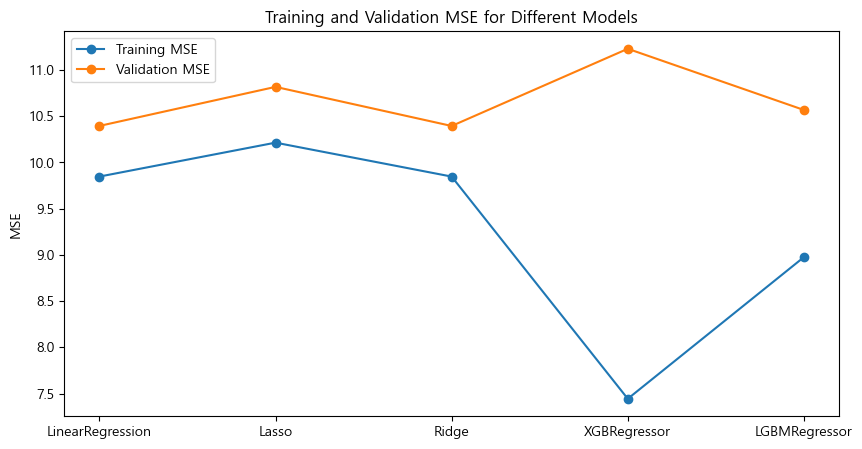

In [49]:
#(train / val) 시각화
plot_mse_for_models_line(models, X_train, y_train, X_val, y_val)

In [50]:
#모델 test평가
evaluate_models_on_test(models, X_test, y_test)

Model Test Performance Evaluation:

Model            	Test MSE		Test R²
---------------------------------------------------------
LinearRegression 	9.6048		0.03
Lasso            	9.9480		0.00
Ridge            	9.6041		0.03
XGBRegressor     	10.7963		-0.09
LGBMRegressor    	9.7750		0.02


#xgboost early stop

[0]	validation_0-rmse:4.32699	validation_1-rmse:4.42212
[1]	validation_0-rmse:3.75373	validation_1-rmse:3.86915
[2]	validation_0-rmse:3.43356	validation_1-rmse:3.56321
[3]	validation_0-rmse:3.25991	validation_1-rmse:3.40205
[4]	validation_0-rmse:3.16899	validation_1-rmse:3.31986


[5]	validation_0-rmse:3.12088	validation_1-rmse:3.27829
[6]	validation_0-rmse:3.08981	validation_1-rmse:3.25746
[7]	validation_0-rmse:3.06907	validation_1-rmse:3.24996
[8]	validation_0-rmse:3.05957	validation_1-rmse:3.24509
[9]	validation_0-rmse:3.05232	validation_1-rmse:3.24257
[10]	validation_0-rmse:3.04807	validation_1-rmse:3.24174
[11]	validation_0-rmse:3.03920	validation_1-rmse:3.24279
[12]	validation_0-rmse:3.03649	validation_1-rmse:3.24345
[13]	validation_0-rmse:3.03236	validation_1-rmse:3.24447
[14]	validation_0-rmse:3.02467	validation_1-rmse:3.24732
[15]	validation_0-rmse:3.02306	validation_1-rmse:3.24808
[16]	validation_0-rmse:3.01756	validation_1-rmse:3.25094
[17]	validation_0-rmse:3.01179	validation_1-rmse:3.25322
[18]	validation_0-rmse:3.00944	validation_1-rmse:3.25368
[19]	validation_0-rmse:2.99988	validation_1-rmse:3.25309


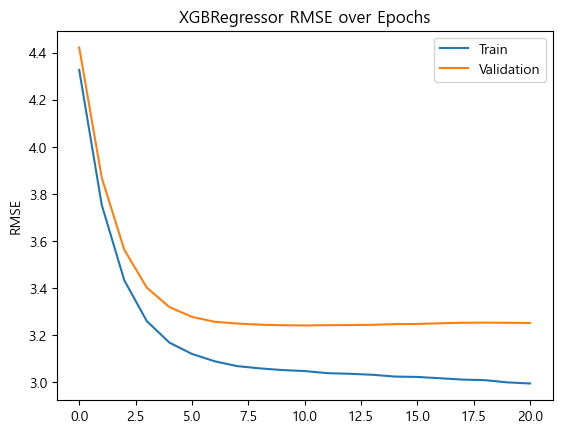

Xgboost Best Epoch:  10


In [51]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


reg_xgb = XGBRegressor()
eval_set = [(X_train, y_train), (X_val, y_val)]
reg_xgb.fit(X_train, y_train, eval_metric="rmse", eval_set=eval_set,
            early_stopping_rounds=10, verbose=True)
# Accessing the RMSE values stored during training
results = reg_xgb.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

# Plotting
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Validation')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBRegressor RMSE over Epochs')
plt.show()

best_epoch = reg_xgb.best_iteration
print("Xgboost Best Epoch: ", best_epoch)

#xgboost best_iteration으로 test 진행

In [52]:
from sklearn.metrics import mean_squared_error, r2_score

# 테스트 데이터셋에 대한 예측 수행 (최적의 에포크를 사용)
pred_test = reg_xgb.predict(X_test, iteration_range=(0, best_epoch + 1))

# 테스트 데이터셋에 대한 성능 평가
mse_test = mean_squared_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)

# 결과 출력
print("XGBoost Test MSE: ", mse_test)
print("XGBoost Test R² Score: {:.2f}%".format(r2_test * 100))


XGBoost Test MSE:  10.060641109717093
XGBoost Test R² Score: -1.12%


#xgboost early stop 제출

In [53]:
pred_test_xgb_earyly = reg_xgb.predict(test_x, iteration_range=(0, best_epoch + 1))

In [54]:
Target_Encoder_xgb_early = pd.read_csv('./sample_submission.csv')

In [55]:
len(pred_test_xgb_earyly)

10963

In [56]:
Target_Encoder_xgb_early['ECLO'] = pred_test_xgb_earyly

# 결과 확인
Target_Encoder_xgb_early

,ID,ECLO
0,ACCIDENT_39609,4.398352
1,ACCIDENT_39610,3.629013
2,ACCIDENT_39611,5.356862
3,ACCIDENT_39612,4.353231
4,ACCIDENT_39613,5.195838
...,...,...
10958,ACCIDENT_50567,10.406368
10959,ACCIDENT_50568,5.223470
10960,ACCIDENT_50569,5.246473
10961,ACCIDENT_50570,5.947248


In [57]:
# Target_Encoder_xgb_early.to_csv("./Target_Encoder_xgb_early_delete_columns.csv", index=False)

#light gbm early stop 적용

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[35]	valid_0's rmse: 3.23234	valid_0's l2: 10.448


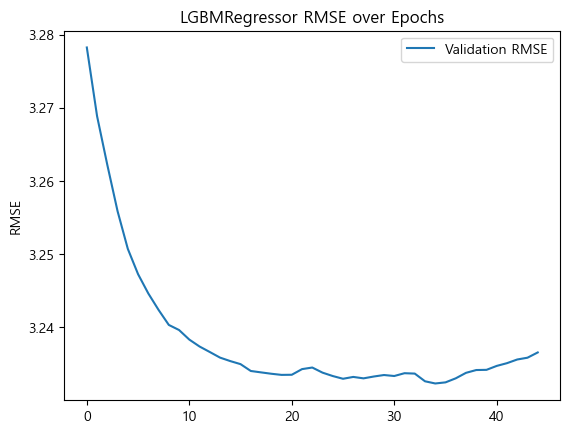

Best Iteration:  35


In [58]:
from lightgbm import LGBMRegressor, early_stopping
import matplotlib.pyplot as plt

# Initialize the model with verbosity settings
reg_lgbm = LGBMRegressor(verbose=-1)  # Set to -1 to suppress output, or a positive integer for verbosity
eval_set = [(X_val, y_val)]  # Evaluation set for early stopping

# Fit the model with early stopping
reg_lgbm.fit(X_train, y_train, eval_metric="rmse", eval_set=eval_set,
             callbacks=[early_stopping(stopping_rounds=10)])

# Accessing the RMSE values
results = reg_lgbm.evals_result_
epochs = len(results['valid_0']['rmse'])  # Adjust the key based on your evals_result structure
x_axis = range(0, epochs)

# Plotting
fig, ax = plt.subplots()
ax.plot(x_axis, results['valid_0']['rmse'], label='Validation RMSE')
ax.legend()
plt.ylabel('RMSE')
plt.title('LGBMRegressor RMSE over Epochs')
plt.show()

# Best iteration
best_iteration = reg_lgbm.best_iteration_
print("Best Iteration: ", best_iteration)


In [59]:
from sklearn.metrics import mean_squared_error, r2_score

# 테스트 데이터셋에 대한 예측 수행
pred_test = reg_lgbm.predict(X_test, num_iteration=best_iteration)

# 테스트 데이터셋에 대한 성능 평가
mse_test = mean_squared_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)

# 결과 출력
print("Test MSE: ", mse_test)
print("Test R² Score: {:.2f}%".format(r2_test * 100))


Test MSE:  9.680446367546265
Test R² Score: 2.70%


In [60]:
pred_test = reg_lgbm.predict(test_x, num_iteration=best_iteration)

In [61]:
Target_Encoder_lgb = pd.read_csv('./sample_submission.csv')

In [62]:
Target_Encoder_lgb

,ID,ECLO
0,ACCIDENT_39609,0
1,ACCIDENT_39610,0
2,ACCIDENT_39611,0
3,ACCIDENT_39612,0
4,ACCIDENT_39613,0
...,...,...
10958,ACCIDENT_50567,0
10959,ACCIDENT_50568,0
10960,ACCIDENT_50569,0
10961,ACCIDENT_50570,0


In [63]:
len(pred_test)

10963

In [64]:
Target_Encoder_lgb['ECLO'] = pred_test

# 결과 확인
Target_Encoder_lgb

,ID,ECLO
0,ACCIDENT_39609,4.335959
1,ACCIDENT_39610,3.665640
2,ACCIDENT_39611,5.587010
3,ACCIDENT_39612,4.786324
4,ACCIDENT_39613,5.241713
...,...,...
10958,ACCIDENT_50567,7.574316
10959,ACCIDENT_50568,5.400694
10960,ACCIDENT_50569,4.946986
10961,ACCIDENT_50570,6.390750


In [65]:
# Target_Encoder_lgb.to_csv("./Target_Encoder_lgb_early_delete_columns.csv", index=False)

# Deep Learning

In [66]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.regularizers import l1 as l1_regularizer, l2 as l2_regularizer
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import pandas as pd

# RMSLE 손실 함수 정의
def rmsle(y_true, y_pred):
    y_true = tf.maximum(tf.cast(y_true, tf.float32), 0)
    y_pred = tf.maximum(tf.cast(y_pred, tf.float32), 0)
    squared_error = tf.square(tf.math.log1p(y_pred) - tf.math.log1p(y_true))
    return tf.sqrt(tf.reduce_mean(squared_error))

# 모델 생성 함수 정의
def create_model(learning_rate, l1_reg, l2_reg):
    input_layer = tf.keras.Input(shape=(len(train_x.columns),))
    x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(input_layer)
    x = tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=l1_regularizer(l1_reg))(x)
    x = tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=l2_regularizer(l2_reg))(x)
    output_layer = tf.keras.layers.Dense(1)(x)
    
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                  loss=rmsle,
                  metrics=[rmsle])
    return model

def loss_fn(y_true, y_pred):
    return rmsle(y_true, y_pred) #차이 손실함수 반환

def metric_fn(y_true, y_pred):
    return rmsle(y_true, y_pred)

In [67]:
callbacks_list = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=2, mode='min',restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, min_lr=0.00001),
    tf.keras.callbacks.TerminateOnNaN()
] 

In [68]:
# # KerasRegressor 래퍼를 사용
# model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=32, verbose=0)

# # 하이퍼파라미터 그리드 정의
# param_grid = {
#     'learning_rate': [0.1, 0.01, 0.001, 0.0001],
#     'l1_reg': [0.01, 0.001, 0.0001],
#     'l2_reg': [0.01, 0.001, 0.0001],
#     'batch_size': [32, 64, 128]
# }

# # 사용자 정의 스코어링 함수 (RMSLE)
# def rmsle_scorer(y_true, y_pred):
#     y_true = np.maximum(y_true, 0)
#     y_pred = np.maximum(y_pred, 0)
#     squared_error = np.square(np.log1p(y_pred) - np.log1p(y_true))
#     return np.sqrt(np.mean(squared_error))

# # GridSearchCV 생성
# grid = GridSearchCV(estimator=model, 
#                     param_grid=param_grid, 
#                     scoring=make_scorer(rmsle_scorer, greater_is_better=False), 
#                     cv=3)

# # 그리드 서치 실행
# grid_result = grid.fit(train_x.astype('float32'), train_y.astype('float32'))

# # 결과 출력
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# # 결과를 데이터프레임으로 변환 후 CSV 파일로 저장
# results_df = pd.DataFrame(grid_result.cv_results_)
# results_df.to_csv('one_hot_hyperparameter_tuning_results.csv', index=False)

# 최적의 파라미터
Best: -0.444455 using {'batch_size': 128, 'l1_reg': 0.0001, 'l2_reg': 0.001, 'learning_rate': 0.001}

In [69]:
import tensorflow as tf
from tensorflow.keras.regularizers import l1 as l1_regularizer, l2 as l2_regularizer

def create_optimized_model():
    input_layer = tf.keras.Input(shape=(len(train_x.columns),))
    x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(input_layer)
    x = tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=l1_regularizer(0.0001))(x)  # l1_reg 수정
    x = tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=l2_regularizer(0.001))(x)  # l2_reg 유지
    output_layer = tf.keras.layers.Dense(1)(x)
    
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=tf.keras.optimizers.Adam(0.001),  # learning_rate 유지
                  loss=loss_fn,
                  metrics=[metric_fn])
    return model

# 최적화된 모델 생성
optimized_model = create_optimized_model()

# 모델 학습
history = optimized_model.fit(train_x.astype('float32'), train_y.astype('float32'),
                              epochs=100, batch_size=128, verbose=1,  # batch_size 수정
                              validation_split=0.1, callbacks=callbacks_list)


Epoch 1/100
279/279 [==============================] - 1s 2ms/step - loss: 0.6648 - metric_fn: 0.6401 - val_loss: 0.4781 - val_metric_fn: 0.4561 - lr: 0.0010
Epoch 2/100
279/279 [==============================] - 0s 1ms/step - loss: 0.4804 - metric_fn: 0.4606 - val_loss: 0.4648 - val_metric_fn: 0.4471 - lr: 0.0010
Epoch 3/100
279/279 [==============================] - 0s 1ms/step - loss: 0.4703 - metric_fn: 0.4544 - val_loss: 0.4495 - val_metric_fn: 0.4347 - lr: 0.0010
Epoch 4/100
279/279 [==============================] - 0s 1ms/step - loss: 0.4647 - metric_fn: 0.4511 - val_loss: 0.4440 - val_metric_fn: 0.4314 - lr: 0.0010
Epoch 5/100
279/279 [==============================] - 0s 1ms/step - loss: 0.4607 - metric_fn: 0.4489 - val_loss: 0.4405 - val_metric_fn: 0.4296 - lr: 0.0010
Epoch 6/100
279/279 [==============================] - 0s 1ms/step - loss: 0.4584 - metric_fn: 0.4481 - val_loss: 0.4391 - val_metric_fn: 0.4294 - lr: 0.0010
Epoch 7/100
279/279 [==============================]

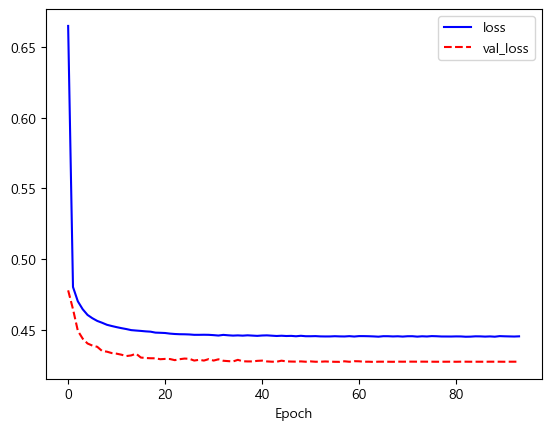

In [70]:
# train loss, val loss 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [71]:
sample_submission = pd.read_csv('./sample_submission.csv')

sample_submission["ECLO"] = optimized_model.predict(test_x.astype('float32'))

sample_submission.to_csv("onehot_dl_BEST.csv", index=False)

343/343 [==============================] - 0s 815us/step
